## Analiza koronowirusa dane z 15 marca 2020

![Python](pandas.jpg)

In [1]:
# import bibliotek
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# wczytujemy plik z internetu
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-16.xls'

In [13]:
# wczytanie danych do dataframe o nazwie frame
frame = pd.read_excel(url, sheet_name=0)

In [14]:
frame.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA


In [15]:
frame.shape

(5250, 7)

In [16]:
# pokazuje typy zmiennych w kolumnach
frame.dtypes

DateRep         datetime64[ns]
CountryExp              object
NewConfCases             int64
NewDeaths              float64
GeoId                   object
Gaul1Nuts1              object
EU                      object
dtype: object

In [17]:
# to jest mały trick- tworzymy kolumnę 'time' aby format daty był kompatybilny z pandas
frame['time'] = pd.to_datetime(frame.DateRep)

In [18]:
# kolumny
frame.columns

Index(['DateRep', 'CountryExp', 'NewConfCases', 'NewDeaths', 'GeoId',
       'Gaul1Nuts1', 'EU', 'time'],
      dtype='object')

In [19]:
frame[frame.CountryExp == "Poland"]

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,time
3940,2020-03-16,Poland,21,0.0,PL,NaN,EU,2020-03-16
3941,2020-03-15,Poland,36,1.0,PL,NaN,EU,2020-03-15
3942,2020-03-14,Poland,19,1.0,PL,NaN,EU,2020-03-14
3943,2020-03-13,Poland,18,1.0,PL,NaN,EU,2020-03-13
3944,2020-03-12,Poland,9,0.0,PL,NaN,EU,2020-03-12
3945,2020-03-11,Poland,5,0.0,PL,NaN,EU,2020-03-11
3946,2020-03-10,Poland,6,0.0,PL,NaN,EU,2020-03-10
3947,2020-03-09,Poland,5,0.0,PL,NaN,EU,2020-03-09
3948,2020-03-08,Poland,1,0.0,PL,NaN,EU,2020-03-08
3949,2020-03-07,Poland,4,0.0,PL,NaN,EU,2020-03-07


In [20]:
# grupowanie wg powtarzających się danych w kolumnie, sumowanie i sortowanie
frame.groupby(frame.CountryExp).sum().sort_values(by = 'NewConfCases', ascending = False)

,NewConfCases,NewDeaths
CountryExp,,
China,81020,3217.0
Italy,23980,1811.0
Iran,13938,724.0
South Korea,8236,75.0
Spain,7753,288.0
France,5423,127.0
Germany,4838,12.0
United States of America,3774,69.0
Switzerland,1933,10.0


In [22]:
# wynik powyżej nie pozwala odczytać danych dla Polski, filtrujemy
data = frame.groupby(frame.CountryExp).sum().sort_values(by='NewConfCases', ascending=False)
data[data.NewConfCases < 300]

,NewConfCases,NewDeaths
CountryExp,,
Australia,298,5.0
switzerland,267,3.0
Czech Republic,267,0.0
Finland,267,0.0
Israel,250,0.0
Portugal,245,0.0
Singapore,226,0.0
Slovenia,219,0.0
Bahrain,214,0.0


In [24]:
# analiza wg miesięcy dot. Polski (True) oraz pozostałych krajów
frame.groupby([frame.CountryExp=='Poland', frame.time.dt.month]).sum()

NewConfCases  NewDeaths
CountryExp time                         
False      1             9799      213.0
           2            75377     2708.0
           3            82086     3583.0
           12              27        0.0
True       3              125        3.0

In [26]:
# analiza w którym dniu tygodnia jest nawięcej przypadków
frame.groupby([frame.CountryExp == 'Poland', frame.time.dt.weekday]).sum()

NewConfCases  NewDeaths
CountryExp time                         
False      0            31158     1483.0
           1            16669      659.0
           2            17114      757.0
           3            31510      925.0
           4            23174      767.0
           5            24828     1008.0
           6            22836      905.0
True       0               26        0.0
           1                6        0.0
           2                6        0.0
           3                9        0.0
           4               18        1.0
           5               23        1.0
           6               37        1.0

**najwięcej zachorować i zgonów miało miejsce w piątek, sobotę i niedzielę!

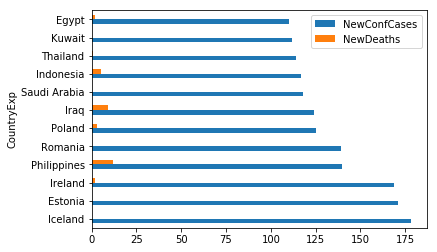

In [27]:
# wkres
data[(data.NewConfCases < 200) & (data.NewConfCases > 100)].plot.barh()